## Ana Percentiles ##

In the observations, looking at the sfcWind and u and c components when temperatures are at their lowest in ERA5.

First we can just use Hannah's CLEARHEADS datasets from 1950 to 2020.

In [1]:
# import relevant libraries
import os
import sys
import glob

# Import pandas
import pandas as pd
import numpy as np

In [2]:
# set up the paths to the data
hannah_ch_path = "/home/users/benhutch/unseen_multi_year/dfs/UK_clearheads_data_daily_1950_2020_ONDJFM.csv"

# Set up the path to the sotc data
sotc_path = "/home/users/benhutch/energy-sotcr-2023/data/ERA5_UK_1940_2023_daily_SP_WP_demand_wind.csv"

In [3]:
# import these dataframes
hannah_ch = pd.read_csv(hannah_ch_path)

sotc = pd.read_csv(sotc_path)

In [4]:
hannah_ch.head()

,Unnamed: 0,solar_power,100m_wind_speed,10m_wind_speed,solar_irradiance,ofs_cfs,ons_cfs,t2m_no_detrend,t2m_2020_detrend,United_Kingdom_demand,United_Kingdom_wd_demand
0,1950-01-01,0.017917,8.046321,5.313242,18.246765,0.375553,0.378995,5.568366,7.035546,38.408018,43.098834
1,1950-01-02,0.009749,8.309860,5.536100,10.066186,0.755816,0.260311,7.458939,8.926063,40.257548,41.065818
2,1950-01-03,0.006689,5.999976,3.996584,6.909895,0.383306,0.247291,6.999079,8.466145,41.153278,41.153278
3,1950-01-04,0.014198,7.579509,4.991658,14.658528,0.503725,0.366872,7.507976,8.974984,40.990399,40.990399
4,1950-01-05,0.009825,9.282607,6.286204,10.173406,0.768395,0.415419,6.869317,8.336267,41.490605,41.490605


In [5]:
sotc.head()

,date,United_Kingdom_solar_cf,United_Kingdom_wind_cf,United_Kingdom_demand,United_Kingdom_wd_demand,UK_wind_speed,UK_temp,United_Kingdom_wind_gen,United_Kingdom_solar_gen,demand_net_wind,wd_demand_net_wind,demand_net_renewables,wd_demand_net_renewables,demandESO,demandESO_net_wind,demandESO_net_renewables
0,1940-01-01,0.016125,0.344934,46.420023,47.228293,6.961509,-0.688529,10.217639,0.248370,36.202385,37.010655,35.954015,36.762285,NaN,NaN,NaN
1,1940-01-02,0.013857,0.235733,47.953306,47.953306,5.675701,-1.658305,6.982887,0.213429,40.970419,40.970419,40.756990,40.756990,NaN,NaN,NaN
2,1940-01-03,0.093672,0.386296,47.568234,47.568234,7.631405,-1.143233,11.442862,1.442796,36.125371,36.125371,34.682575,34.682575,NaN,NaN,NaN
3,1940-01-04,0.094658,0.468219,46.787436,46.787436,8.341800,-0.098840,13.869574,1.457991,32.917862,32.917862,31.459871,31.459871,NaN,NaN,NaN
4,1940-01-05,0.111828,0.168710,46.014368,46.914110,5.555250,-0.268279,4.997523,1.722460,41.016845,41.916587,39.294385,40.194127,NaN,NaN,NaN


In [6]:
# make sure that "Unnamed: 0" is a datetime
hannah_ch["Unnamed: 0"] = pd.to_datetime(hannah_ch["Unnamed: 0"])

# make sure that date is a datetime
sotc["date"] = pd.to_datetime(sotc["date"])

# Set these as index
hannah_ch.set_index("Unnamed: 0", inplace=True)

sotc.set_index("date", inplace=True)

In [7]:
# restrict both dataframes to months 12, 1, 2
hannah_ch_djf = hannah_ch[hannah_ch.index.month.isin([12, 1, 2])]
sotc_djf = sotc[sotc.index.month.isin([12, 1, 2])]

In [8]:
# set up the hazel data years
hazel_data_years = np.arange(1979, 2013 + 1)

In [9]:
hannah_ch_djf.columns

Index(['solar_power', '100m_wind_speed', '10m_wind_speed', 'solar_irradiance',
       'ofs_cfs', 'ons_cfs', 't2m_no_detrend', 't2m_2020_detrend',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand'],
      dtype='object')

In [10]:
sotc_djf.columns

Index(['United_Kingdom_solar_cf', 'United_Kingdom_wind_cf',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand', 'UK_wind_speed',
       'UK_temp', 'United_Kingdom_wind_gen', 'United_Kingdom_solar_gen',
       'demand_net_wind', 'wd_demand_net_wind', 'demand_net_renewables',
       'wd_demand_net_renewables', 'demandESO', 'demandESO_net_wind',
       'demandESO_net_renewables'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt

# Find the min year in hannah ch
min_year_ch = hannah_ch_djf.index.year.min()
max_year_ch = hannah_ch_djf.index.year.max()

# Find the min year in sotc
min_year_sotc = sotc_djf.index.year.min()
max_year_sotc = sotc_djf.index.year.max()

# set up new dataframes
hannah_ch_djf_perc = pd.DataFrame()
sotc_djf_perc = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 10 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_ch = hannah_ch_djf["t2m_no_detrend"].quantile(percentile / 100)
    tas_percentile_this_sotc = sotc_djf["UK_temp"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    hannah_ch_djf_this = hannah_ch_djf[hannah_ch_djf["t2m_no_detrend"] < tas_percentile_this_ch]
    sotc_djf_this = sotc_djf[sotc_djf["UK_temp"] < tas_percentile_this_sotc]

    # Set up a new dataframe
    hannah_ch_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_ch],
            "n_days": [hannah_ch_djf_this.shape[0]],
            "mean_10m_wind_speed": [hannah_ch_djf_this["10m_wind_speed"].mean()],
            "mean_100m_wind_speed": [hannah_ch_djf_this["100m_wind_speed"].mean()],
        }
    )

    # Set up a new dataframe
    sotc_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_sotc],
            "n_days": [sotc_djf_this.shape[0]],
            "mean_10m_wind_speed": [sotc_djf_this["UK_wind_speed"].mean()],
        }
    )

    # Concat these dataframes
    hannah_ch_djf_perc = pd.concat([hannah_ch_djf_perc, hannah_ch_djf_perc_this])
    sotc_djf_perc = pd.concat([sotc_djf_perc, sotc_djf_perc_this])

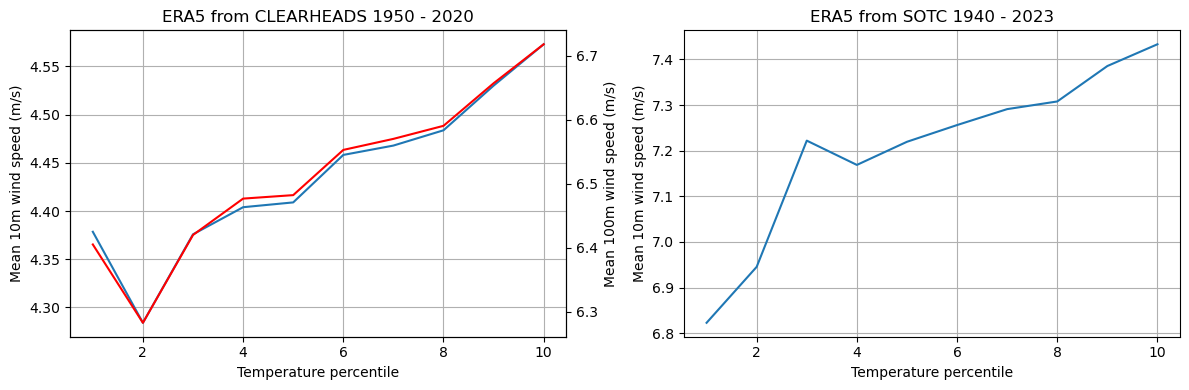

In [12]:
# Set up the plot
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_10m_wind_speed"])

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_100m_wind_speed"], color="red")

# Plot the data
axs[1].plot(sotc_djf_perc["percentile"], sotc_djf_perc["mean_10m_wind_speed"])

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 10m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 10m wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 from CLEARHEADS {min_year_ch} - {max_year_ch}")

# Include titles showing the period
axs[1].set_title(f"ERA5 from SOTC {min_year_sotc} - {max_year_sotc}")

# include gridlines
axs[0].grid()
axs[1].grid()

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [13]:
# do the same but subset SOTC to the same period first
sotc_djf_aligned = sotc_djf.loc[hannah_ch_djf.index]

In [14]:
# set up new dataframes
hannah_ch_djf_perc = pd.DataFrame()
sotc_djf_perc = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 10 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_ch = hannah_ch_djf["t2m_no_detrend"].quantile(percentile / 100)
    tas_percentile_this_sotc = sotc_djf_aligned["UK_temp"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    hannah_ch_djf_this = hannah_ch_djf[hannah_ch_djf["t2m_no_detrend"] < tas_percentile_this_ch]
    sotc_djf_this = sotc_djf_aligned[sotc_djf_aligned["UK_temp"] < tas_percentile_this_sotc]

    # Set up a new dataframe
    hannah_ch_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_ch],
            "n_days": [hannah_ch_djf_this.shape[0]],
            "mean_10m_wind_speed": [hannah_ch_djf_this["10m_wind_speed"].mean()],
            "mean_100m_wind_speed": [hannah_ch_djf_this["100m_wind_speed"].mean()],
        }
    )

    # Set up a new dataframe
    sotc_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_sotc],
            "n_days": [sotc_djf_this.shape[0]],
            "mean_10m_wind_speed": [sotc_djf_this["UK_wind_speed"].mean()],
        }
    )

    # Concat these dataframes
    hannah_ch_djf_perc = pd.concat([hannah_ch_djf_perc, hannah_ch_djf_perc_this])
    sotc_djf_perc = pd.concat([sotc_djf_perc, sotc_djf_perc_this])

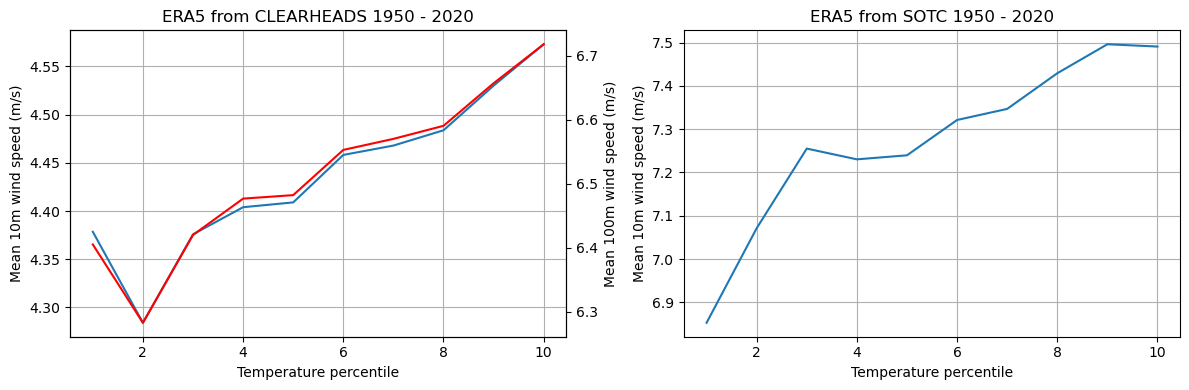

In [15]:
# repeat the plots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_10m_wind_speed"])

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_100m_wind_speed"], color="red")

# Plot the data
axs[1].plot(sotc_djf_perc["percentile"], sotc_djf_perc["mean_10m_wind_speed"])

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 10m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 10m wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 from CLEARHEADS {min_year_ch} - {max_year_ch}")

# Include titles showing the period
axs[1].set_title(f"ERA5 from SOTC {min_year_ch} - {max_year_ch}")

# include gridlines
axs[0].grid()

axs[1].grid()

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [16]:
# subset both to the hazel data years
hannah_ch_djf_hazel = hannah_ch_djf[hannah_ch_djf.index.year.isin(hazel_data_years)]
sotc_djf_hazel = sotc_djf_aligned[sotc_djf_aligned.index.year.isin(hazel_data_years)]

# set up new dataframes
hannah_ch_djf_perc = pd.DataFrame()
sotc_djf_perc = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 10 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_ch = hannah_ch_djf_hazel["t2m_no_detrend"].quantile(percentile / 100)
    tas_percentile_this_sotc = sotc_djf_hazel["UK_temp"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    hannah_ch_djf_this = hannah_ch_djf_hazel[hannah_ch_djf_hazel["t2m_no_detrend"] < tas_percentile_this_ch]
    sotc_djf_this = sotc_djf_hazel[sotc_djf_hazel["UK_temp"] < tas_percentile_this_sotc]

    # Set up a new dataframe
    hannah_ch_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_ch],
            "n_days": [hannah_ch_djf_this.shape[0]],
            "mean_10m_wind_speed": [hannah_ch_djf_this["10m_wind_speed"].mean()],
            "mean_100m_wind_speed": [hannah_ch_djf_this["100m_wind_speed"].mean()],
        }
    )

    # Set up a new dataframe
    sotc_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_sotc],
            "n_days": [sotc_djf_this.shape[0]],
            "mean_10m_wind_speed": [sotc_djf_this["UK_wind_speed"].mean()],
        }
    )

    # Concat these dataframes
    hannah_ch_djf_perc = pd.concat([hannah_ch_djf_perc, hannah_ch_djf_perc_this])
    sotc_djf_perc = pd.concat([sotc_djf_perc, sotc_djf_perc_this])

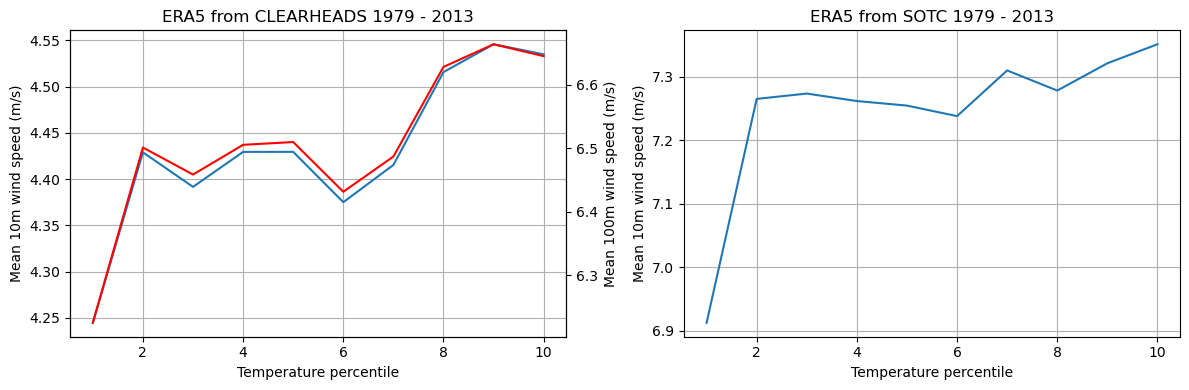

In [17]:
# plot the data
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_10m_wind_speed"])

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_100m_wind_speed"], color="red")

# Plot the data
axs[1].plot(sotc_djf_perc["percentile"], sotc_djf_perc["mean_10m_wind_speed"])

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 10m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 10m wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 from CLEARHEADS {hazel_data_years[0]} - {hazel_data_years[-1]}")

# Include titles showing the period
axs[1].set_title(f"ERA5 from SOTC {hazel_data_years[0]} - {hazel_data_years[-1]}")

# include gridlines
axs[0].grid()
axs[1].grid()

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()


In [18]:
# set up the path to the new data
comp_path_1950_2020 = "/home/users/benhutch/unseen_multi_year/dfs/ERA5_UK_wind_components_1950_2020.csv"
comp_path_1940_1949 = "/home/users/benhutch/unseen_multi_year/dfs/ERA5_UK_wind_components_1940_1949.csv"

# import the data
comp_path_1950_2020 = pd.read_csv(comp_path_1950_2020)
comp_path_1940_1949 = pd.read_csv(comp_path_1940_1949)

In [19]:
comp_path_1950_2020.head()

,Unnamed: 0,10_metre_U_wind_component,100_metre_U_wind_component,2_metre_temperature,100_metre_V_wind_component,10_metre_V_wind_component,air_pressure_at_mean_sea_level
0,1950-01-01 00:00:00,0.386331,0.935215,276.895323,3.575440,2.078656,102796.528974
1,1950-01-01 01:00:00,0.485940,1.096172,277.094161,3.646120,2.129140,102792.264575
2,1950-01-01 02:00:00,0.551973,1.210463,277.094295,3.776513,2.234025,102863.987450
3,1950-01-01 03:00:00,0.732717,1.552703,276.945819,4.024372,2.399045,102801.402777
4,1950-01-01 04:00:00,0.821637,1.727796,277.153835,4.345119,2.587758,102773.254392


In [20]:
comp_path_1940_1949.head()

,Unnamed: 0,100_metre_U_wind_component,100_metre_V_wind_component,2_metre_temperature,Mean_sea_level_pressure
0,1940-01-01 00:00:00,-3.010643,2.058466,270.525034,101784.063668
1,1940-01-01 01:00:00,-3.240462,2.056432,270.605998,101781.536215
2,1940-01-01 02:00:00,-3.426431,2.117577,270.503522,101829.615537
3,1940-01-01 03:00:00,-3.563230,2.355417,270.539283,101852.734112
4,1940-01-01 04:00:00,-3.523177,2.647714,270.627467,101878.532126


In [21]:
# in 1940-1949, rename Mean_sea_level_pressure to air_pressure_at_mean_sea_level
comp_path_1940_1949.rename(columns={"Mean_sea_level_pressure": "air_pressure_at_mean_sea_level"}, inplace=True)

In [22]:
# join the two dataframes, on the Unnamed: 0 column
# where there are values in one dataframe but not the other, fill with NaN
comp_path = pd.concat([comp_path_1940_1949, comp_path_1950_2020], axis=0)

In [23]:
comp_path.tail()

,Unnamed: 0,100_metre_U_wind_component,100_metre_V_wind_component,2_metre_temperature,air_pressure_at_mean_sea_level,10_metre_U_wind_component,10_metre_V_wind_component
622387,2020-12-31 19:00:00,0.953115,-5.673930,274.542994,100903.450419,0.708579,-3.183507
622388,2020-12-31 20:00:00,0.875040,-5.697296,274.471601,100952.081143,0.670062,-3.179471
622389,2020-12-31 21:00:00,0.939768,-5.696156,274.353568,101005.618058,0.706545,-3.154407
622390,2020-12-31 22:00:00,0.949321,-5.369600,274.205866,101054.086288,0.746968,-2.941405
622391,2020-12-31 23:00:00,1.178396,-5.506759,274.291179,101089.806904,0.886655,-2.978678


In [24]:
# Make sure that "Unnamed: 0" is a datetime
comp_path["Unnamed: 0"] = pd.to_datetime(comp_path["Unnamed: 0"])

# Set this as the index
comp_path.set_index("Unnamed: 0", inplace=True)

# restrict to months 12, 1, 2
comp_path_djf = comp_path[comp_path.index.month.isin([12, 1, 2])]

# Take daily means
comp_path_djf = comp_path_djf.resample("D").mean()

In [25]:
comp_path_djf.tail()

,100_metre_U_wind_component,100_metre_V_wind_component,2_metre_temperature,air_pressure_at_mean_sea_level,10_metre_U_wind_component,10_metre_V_wind_component
Unnamed: 0,,,,,,
2020-12-27,7.269214,3.802614,276.728216,97035.114621,4.437414,2.465486
2020-12-28,0.504144,-2.430962,274.405865,97616.179559,0.402814,-1.563478
2020-12-29,2.878448,-5.731280,275.193439,99243.183322,1.902220,-3.196857
2020-12-30,4.281745,-2.514699,274.126288,100163.802887,2.459211,-1.140012
2020-12-31,2.034569,-4.903953,274.138022,100625.613552,1.307105,-2.707067


In [26]:
# quantify the 10m wind speed and 100m wind speed
comp_path_djf["10m_wind_speed"] = np.sqrt(comp_path_djf["10_metre_U_wind_component"] ** 2 + comp_path_djf["10_metre_V_wind_component"] ** 2)
comp_path_djf["100m_wind_speed"] = np.sqrt(comp_path_djf["100_metre_U_wind_component"] ** 2 + comp_path_djf["100_metre_V_wind_component"] ** 2)

In [27]:
comp_path_djf.columns

Index(['100_metre_U_wind_component', '100_metre_V_wind_component',
       '2_metre_temperature', 'air_pressure_at_mean_sea_level',
       '10_metre_U_wind_component', '10_metre_V_wind_component',
       '10m_wind_speed', '100m_wind_speed'],
      dtype='object')

In [28]:
# set up new dataframes
comp_djf_perc = pd.DataFrame()

# set up the min and max year
min_year_comp = comp_path_djf.index.year.min()
max_year_comp = comp_path_djf.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf[comp_path_djf["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_days": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc = pd.concat([comp_djf_perc, comp_djf_perc_this])

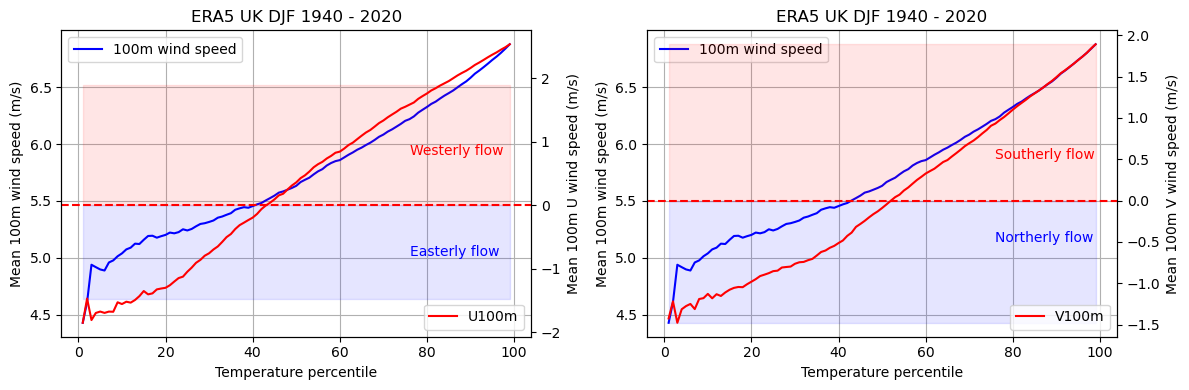

In [29]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs2.text(76, -0.8, "Easterly flow", color="blue")

axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs3.text(76, -0.5, "Northerly flow", color="blue")

axs3.text(76, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

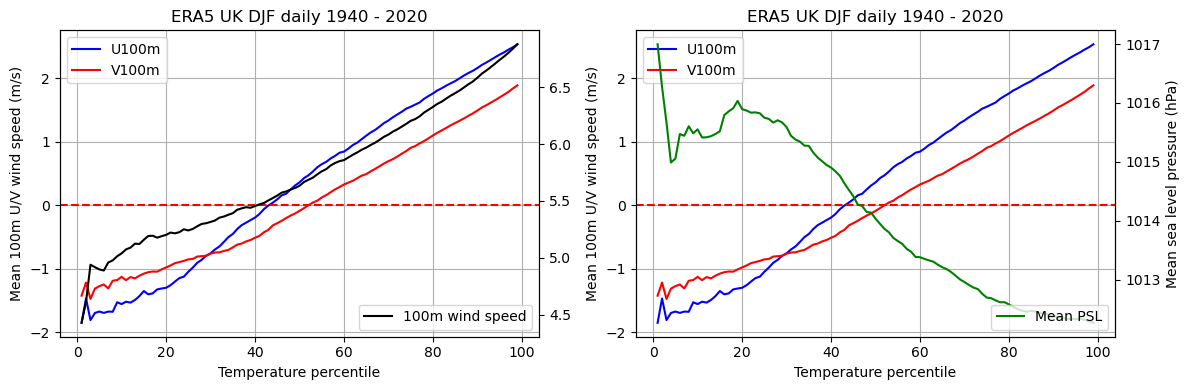

In [30]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_psl"] / 100, color="green", label="Mean PSL")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF daily {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF daily {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [31]:
# limit the data to the hazel data years
comp_path_djf_hazel = comp_path_djf[comp_path_djf.index.year.isin(hazel_data_years)]

# set up min and max year
min_year_comp = comp_path_djf_hazel.index.year.min()
max_year_comp = comp_path_djf_hazel.index.year.max()

# set up new dataframes
comp_djf_perc_hazel = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf_hazel["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf_hazel[comp_path_djf_hazel["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_days": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hazel = pd.concat([comp_djf_perc_hazel, comp_djf_perc_this])

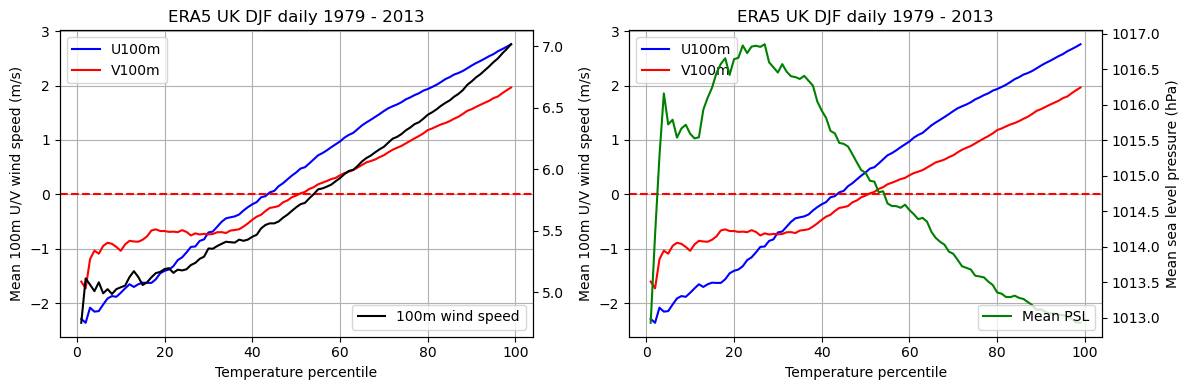

In [32]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_psl"] / 100, color="green", label="Mean PSL")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF daily {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF daily {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

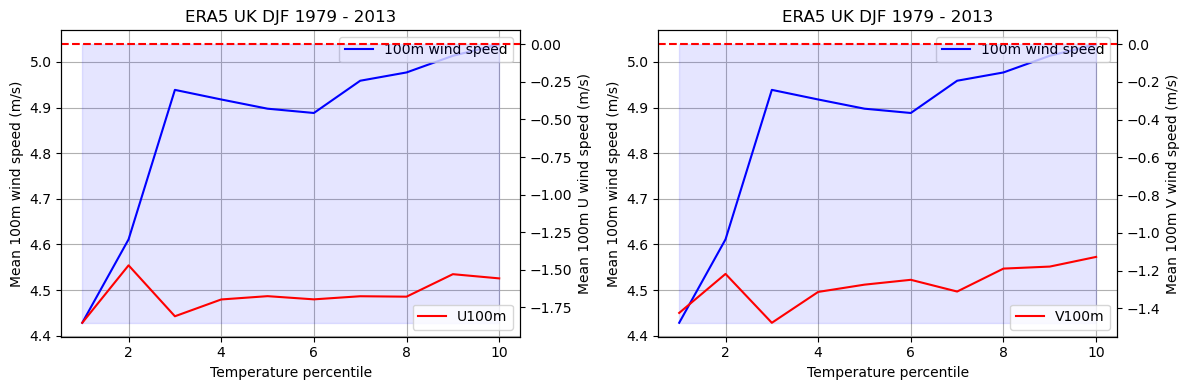

In [33]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs3.text(3, -0.5, "Northerly flow", color="blue")

# axs3.text(3, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper right")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper right")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

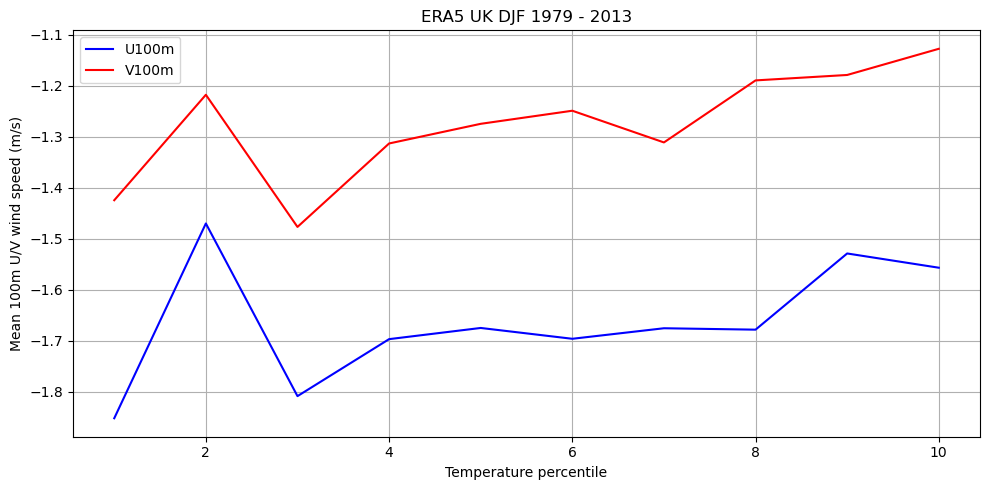

In [34]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()

In [35]:
# Set up the clearheads years
clearheads_years = np.arange(1950, 2020 + 1)

# subset the data to the hazel years
comp_djf_daily_hazel = comp_path_djf[comp_path_djf.index.year.isin(clearheads_years)]

# set up new dataframes
comp_djf_perc = pd.DataFrame()

# set up the min and max year
min_year_comp = comp_djf_daily_hazel.index.year.min()
max_year_comp = comp_djf_daily_hazel.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_djf_daily_hazel["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_djf_daily_hazel[comp_djf_daily_hazel["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_days": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc = pd.concat([comp_djf_perc, comp_djf_perc_this])

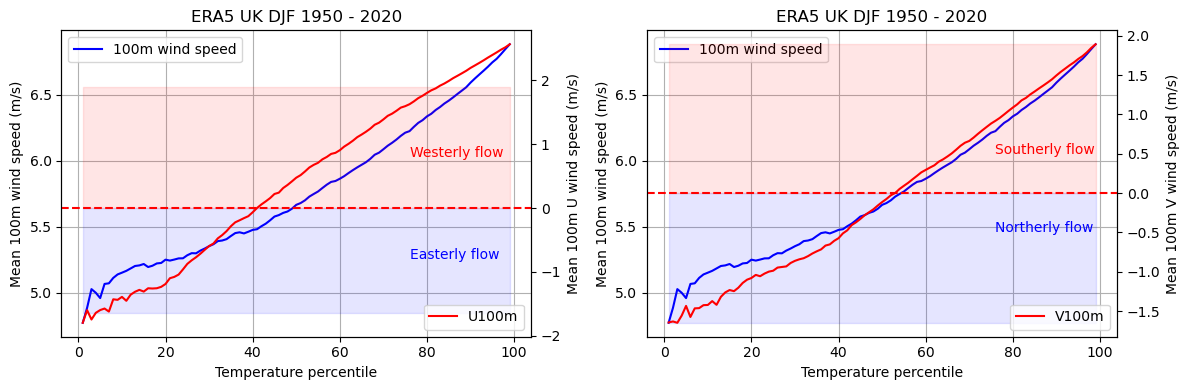

In [36]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs2.text(76, -0.8, "Easterly flow", color="blue")

axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs3.text(76, -0.5, "Northerly flow", color="blue")

axs3.text(76, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

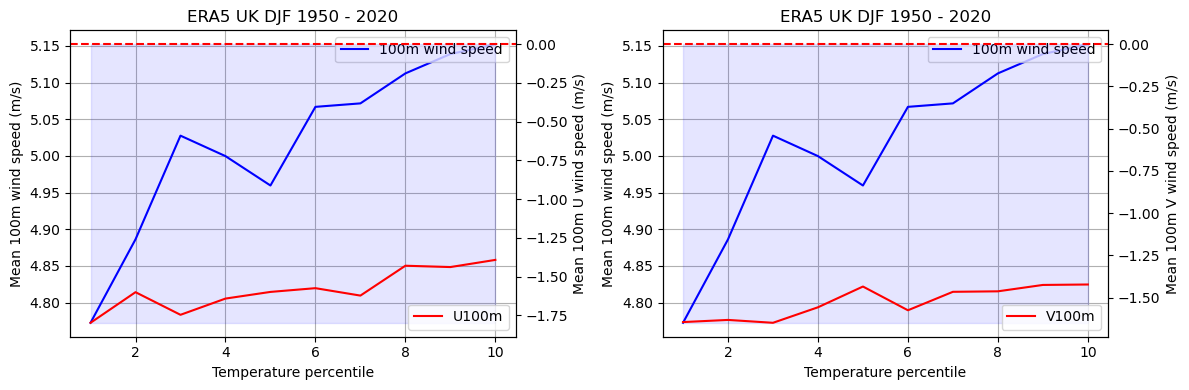

In [37]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs3.text(3, -0.5, "Northerly flow", color="blue")

# axs3.text(3, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper right")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper right")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

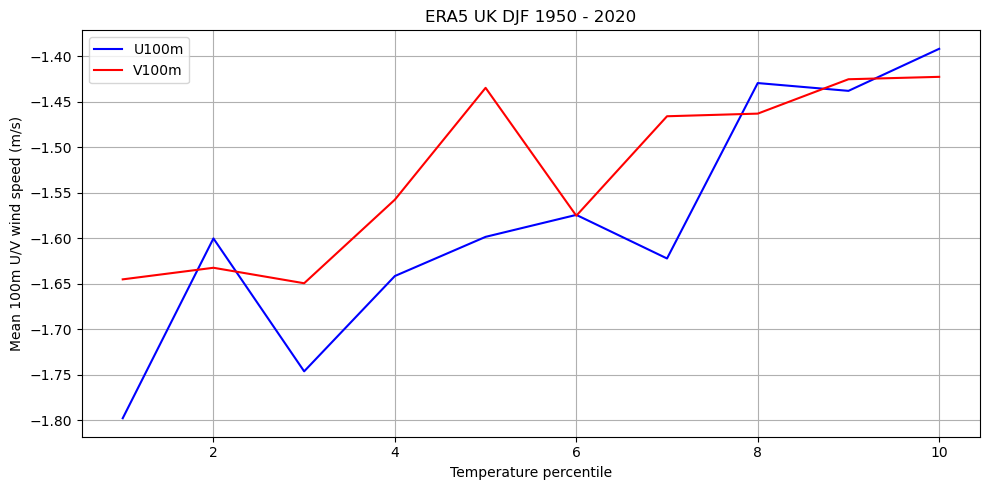

In [38]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()

In [39]:
comp_djf_perc_limited.head()

,percentile,threshold,n_days,mean_10m_U,mean_10m_V,mean_10m_wind_speed,mean_100m_U,05_100m_U,95_100m_U,mean_100m_V,05_100m_V,95_100m_V,mean_100m_wind_speed,05_100m_wind_speed,95_100m_wind_speed,mean_psl,05_psl,95_psl
0,1,270.047931,65,-1.050711,-0.984607,2.794158,-1.797669,-7.097290,3.046217,-1.645060,-5.726338,2.804981,4.772369,1.807867,8.840281,101528.659304,99805.665003,103533.753141
0,2,270.758404,129,-0.945597,-0.972598,2.886444,-1.600080,-8.126860,4.376284,-1.632326,-5.735211,3.376373,4.886181,1.770403,9.034162,101502.185822,99851.679209,103376.513533
0,3,271.378642,193,-1.038745,-0.984572,2.975136,-1.746127,-8.128953,3.962627,-1.649331,-5.907076,3.597649,5.027617,1.780511,9.093621,101453.762901,99777.511184,103266.918445
0,4,271.882351,257,-0.985310,-0.936589,2.974525,-1.641387,-8.024326,4.145220,-1.557488,-6.118917,3.962267,4.999717,1.548340,9.067099,101416.410736,99556.841206,103283.917242
0,5,272.217079,321,-0.963365,-0.865151,2.951373,-1.598356,-8.006373,4.352579,-1.434621,-5.986267,4.326348,4.959635,1.541846,9.056585,101461.900213,99429.849894,103303.120754


In [40]:
# Now limit to the hazel period
comp_djf_daily_haze = comp_path_djf[comp_path_djf.index.year.isin(hazel_data_years)]

# set up new dataframes
comp_djf_perc = pd.DataFrame()

# set up the min and max year
min_year_comp = comp_djf_daily_haze.index.year.min()
max_year_comp = comp_djf_daily_haze.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_djf_daily_haze["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_djf_daily_haze[comp_djf_daily_haze["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_days": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc = pd.concat([comp_djf_perc, comp_djf_perc_this])

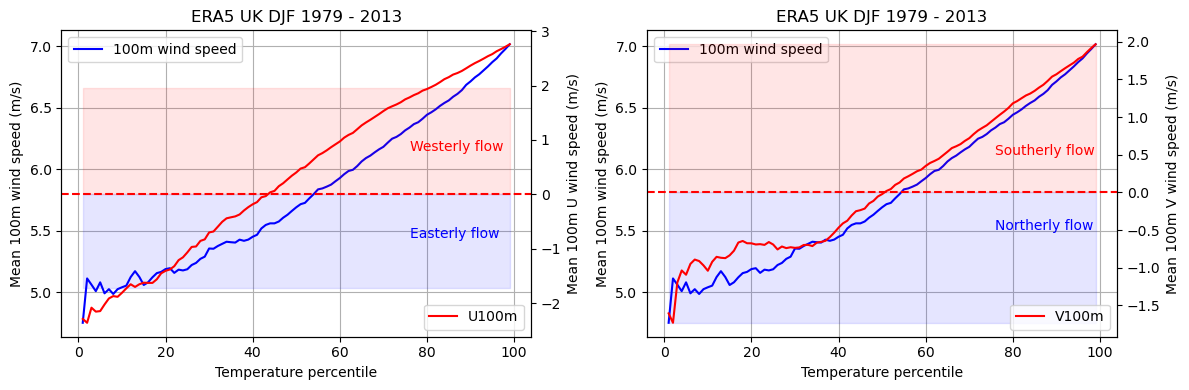

In [41]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs2.text(76, -0.8, "Easterly flow", color="blue")

axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs3.text(76, -0.5, "Northerly flow", color="blue")

axs3.text(76, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

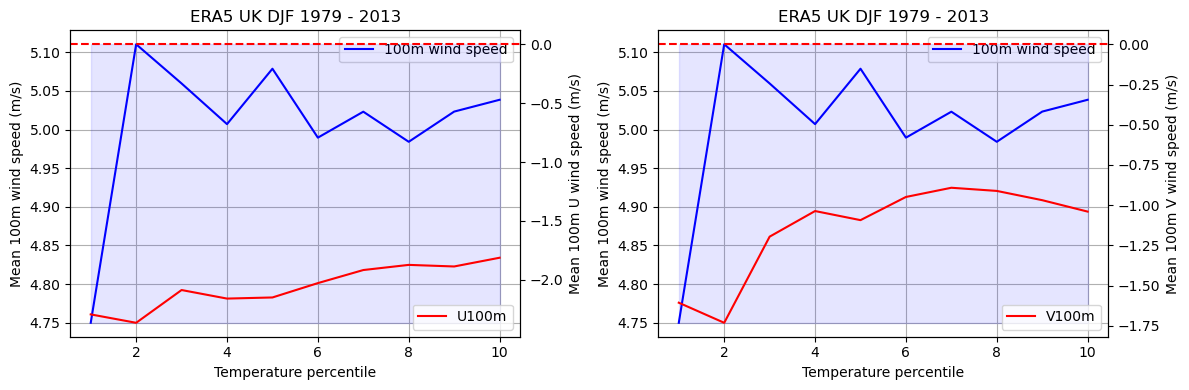

In [42]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs3.text(3, -0.5, "Northerly flow", color="blue")

# axs3.text(3, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper right")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper right")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

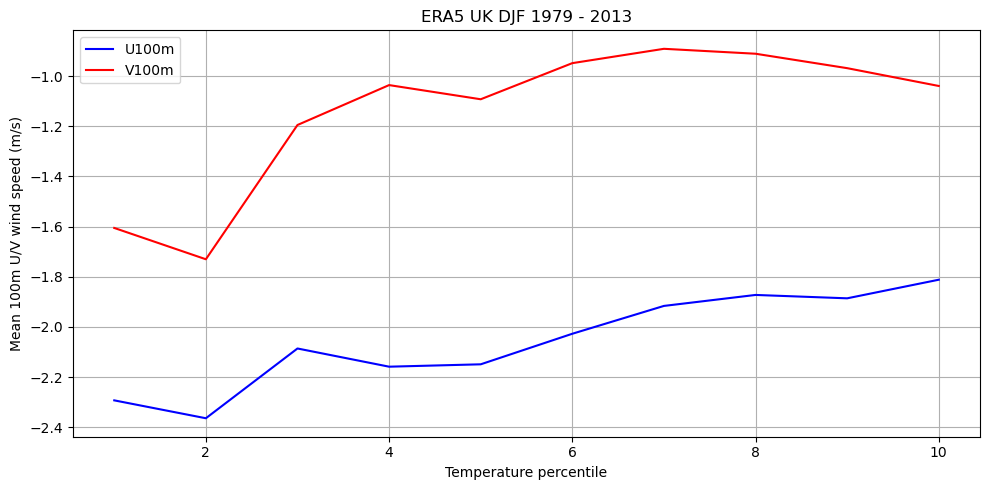

In [43]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()

In [44]:
# do the same, but for the hourly data
comp_path_djf_hourly = comp_path[comp_path.index.month.isin([12, 1, 2])]

In [45]:
# calculate 100m wind speed
comp_path_djf_hourly["100m_wind_speed"] = np.sqrt(
    comp_path_djf_hourly["100_metre_U_wind_component"] ** 2 + comp_path_djf_hourly["100_metre_V_wind_component"] ** 2
)

/tmp/ipykernel_1480534/2542295161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_path_djf_hourly["100m_wind_speed"] = np.sqrt(


In [46]:
# extract the min and max years from this
min_year_comp = comp_path_djf_hourly.index.year.min()
max_year_comp = comp_path_djf_hourly.index.year.max()

# Set up new dataframes
comp_djf_perc_hourly = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf_hourly["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf_hourly[comp_path_djf_hourly["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_hours": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hourly = pd.concat([comp_djf_perc_hourly, comp_djf_perc_this])

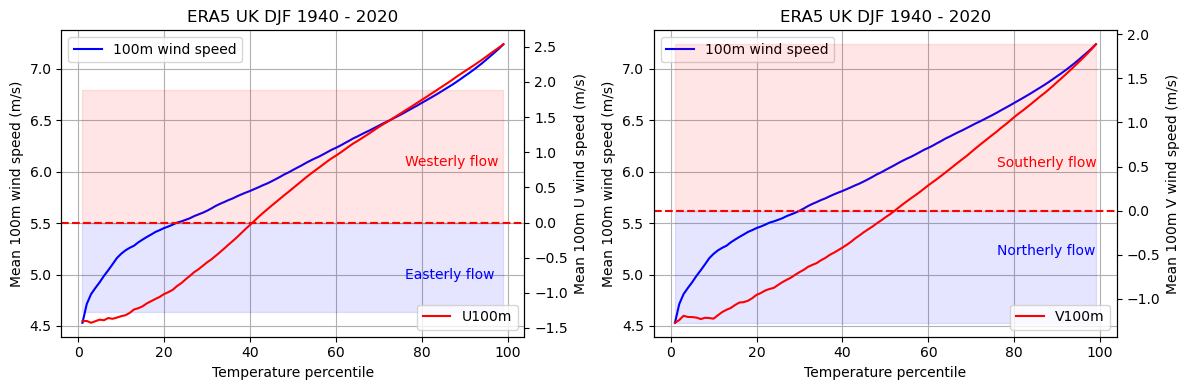

In [47]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs2.text(76, -0.8, "Easterly flow", color="blue")

axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs3.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs3.text(76, -0.5, "Northerly flow", color="blue")

axs3.text(76, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

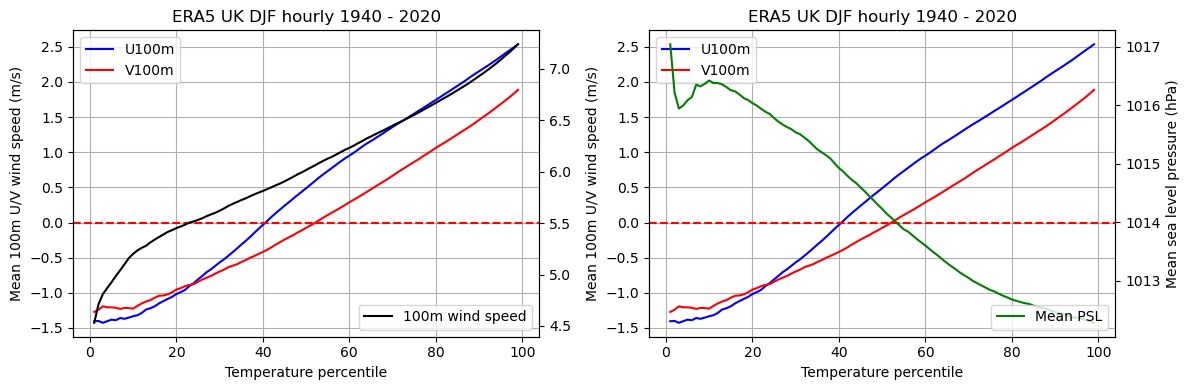

In [48]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_psl"] / 100, color="green", label="Mean PSL")


# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [49]:
# Limit the hourly data to the hazel data years
comp_djf_hourly_haze = comp_path_djf_hourly[comp_path_djf_hourly.index.year.isin(hazel_data_years)]

# Set up new dataframes
comp_djf_perc_hourly_hazel = pd.DataFrame()

# Set up the min and max year
min_year_comp = comp_djf_hourly_haze.index.year.min()
max_year_comp = comp_djf_hourly_haze.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_djf_hourly_haze["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_djf_hourly_haze[comp_djf_hourly_haze["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_hours": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hourly_hazel = pd.concat([comp_djf_perc_hourly_hazel, comp_djf_perc_this])

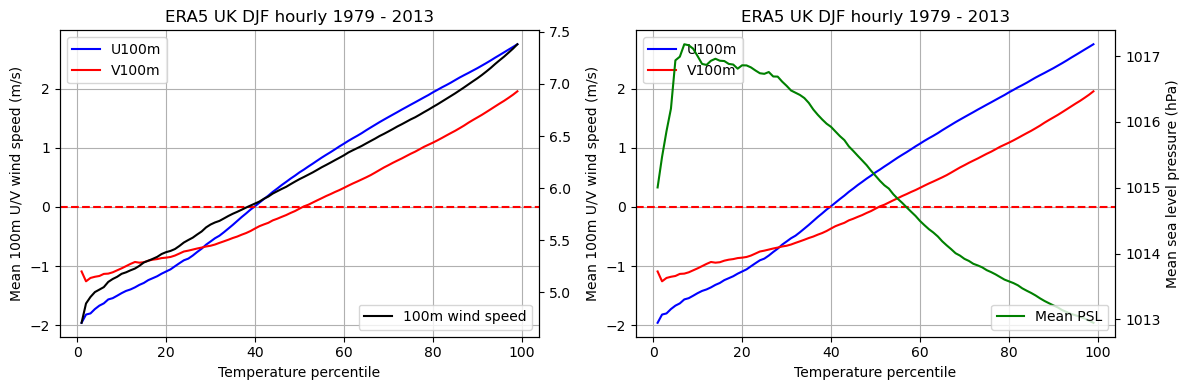

In [50]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_psl"] / 100, color="green", label="Mean PSL")


# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [51]:
# Does the answer change if we detrend the temperature data?
from scipy import signal

# detrend the data
comp_path_djf_hourly["2_metre_temperature_dt"] = signal.detrend(comp_path_djf_hourly["2_metre_temperature"])

# Set up new dataframes
comp_djf_perc_hourly_dt = pd.DataFrame()

# set up the min and max years
min_year_comp = comp_path_djf_hourly.index.year.min()
max_year_comp = comp_path_djf_hourly.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf_hourly["2_metre_temperature_dt"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf_hourly[comp_path_djf_hourly["2_metre_temperature_dt"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_hours": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hourly_dt = pd.concat([comp_djf_perc_hourly_dt, comp_djf_perc_this])

/tmp/ipykernel_1480534/1598770506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_path_djf_hourly["2_metre_temperature_dt"] = signal.detrend(comp_path_djf_hourly["2_metre_temperature"])


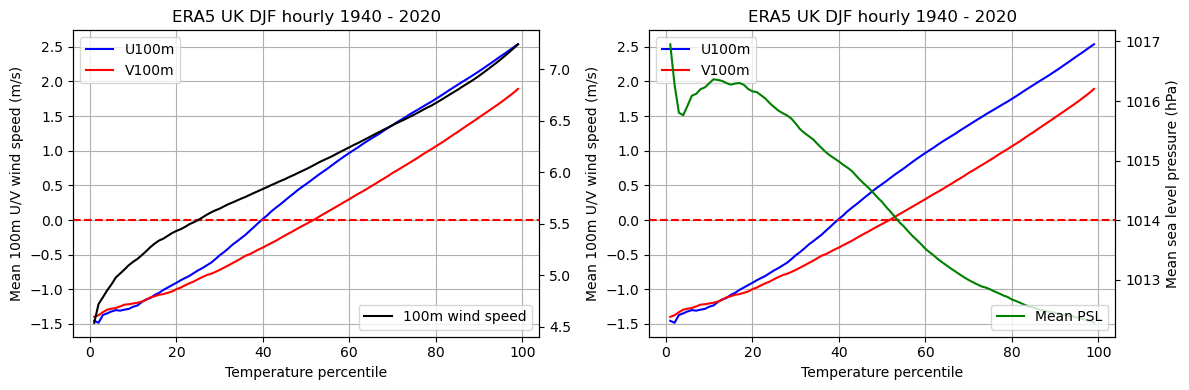

In [52]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_psl"] / 100, color="green", label="Mean PSL")


# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [53]:
# Limit the detrended dataset to the hazel data years
comp_path_djf_hourly_hazel_dt = comp_path_djf_hourly[comp_path_djf_hourly.index.year.isin(hazel_data_years)]

# Set up min and max years
min_year_comp_hazel = comp_path_djf_hourly_hazel_dt.index.year.min()
max_year_comp_hazel = comp_path_djf_hourly_hazel_dt.index.year.max()

# Set up new dataframes
comp_djf_perc_hourly_hazel_dt = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf_hourly_hazel_dt["2_metre_temperature_dt"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf_hourly_hazel_dt[comp_path_djf_hourly_hazel_dt["2_metre_temperature_dt"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_hours": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hourly_hazel_dt = pd.concat([comp_djf_perc_hourly_hazel_dt, comp_djf_perc_this])

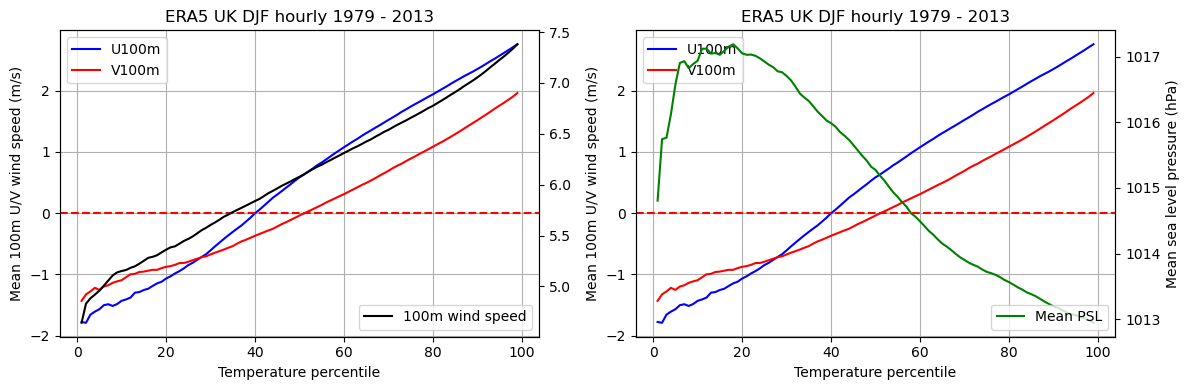

In [54]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_psl"] / 100, color="green", label="Mean PSL")


# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF hourly {min_year_comp_hazel} - {max_year_comp_hazel}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF hourly {min_year_comp_hazel} - {max_year_comp_hazel}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [55]:
# set up decades for ERA5
decades = np.arange(1940, 2020, 10)

# print the decades
print(decades)

# create a list of lists for the years in eahc decade
# e.g. for 1940s, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949
decade_years = [[year for year in range(decade, decade + 10)] for decade in decades]

print(decade_years)

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# set up an empty list for the dataframes
decade_dfs = []

# loop over the decade years
for years_this in decade_years:
    # Subset the data to these years
    comp_path_djf_hourly_this = comp_path_djf_hourly[comp_path_djf_hourly.index.year.isin(years_this)]

    # Set up new dataframe
    comp_djf_perc_hourly_this = pd.DataFrame()

    # Loop over the percentiles
    for percentile in percentiles:
        # Find the percentile for hannah ch
        tas_percentile_this_comp = comp_path_djf_hourly_this["2_metre_temperature"].quantile(percentile / 100)

        # Subset the df to where temperature is below this threshold
        comp_djf_this = comp_path_djf_hourly_this[comp_path_djf_hourly_this["2_metre_temperature"] < tas_percentile_this_comp]

        # Set up a new dataframe
        comp_djf_perc_this = pd.DataFrame(
            {
                "percentile": [percentile],
                "threshold": [tas_percentile_this_comp],
                "n_hours": [comp_djf_this.shape[0]],
                "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
                "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
                "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
                "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
                "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
                "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
                "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
                "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
                "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
                "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
                "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
                "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
                "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
                "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
            }
        )

        # Concat these dataframes
        comp_djf_perc_hourly_this = pd.concat([comp_djf_perc_hourly_this, comp_djf_perc_this])

    # Append the dataframe to the list
    decade_dfs.append(comp_djf_perc_hourly_this)

[1940 1950 1960 1970 1980 1990 2000 2010]
[[1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949], [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959], [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969], [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979], [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999], [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]]


In [56]:
len(decade_dfs)

8

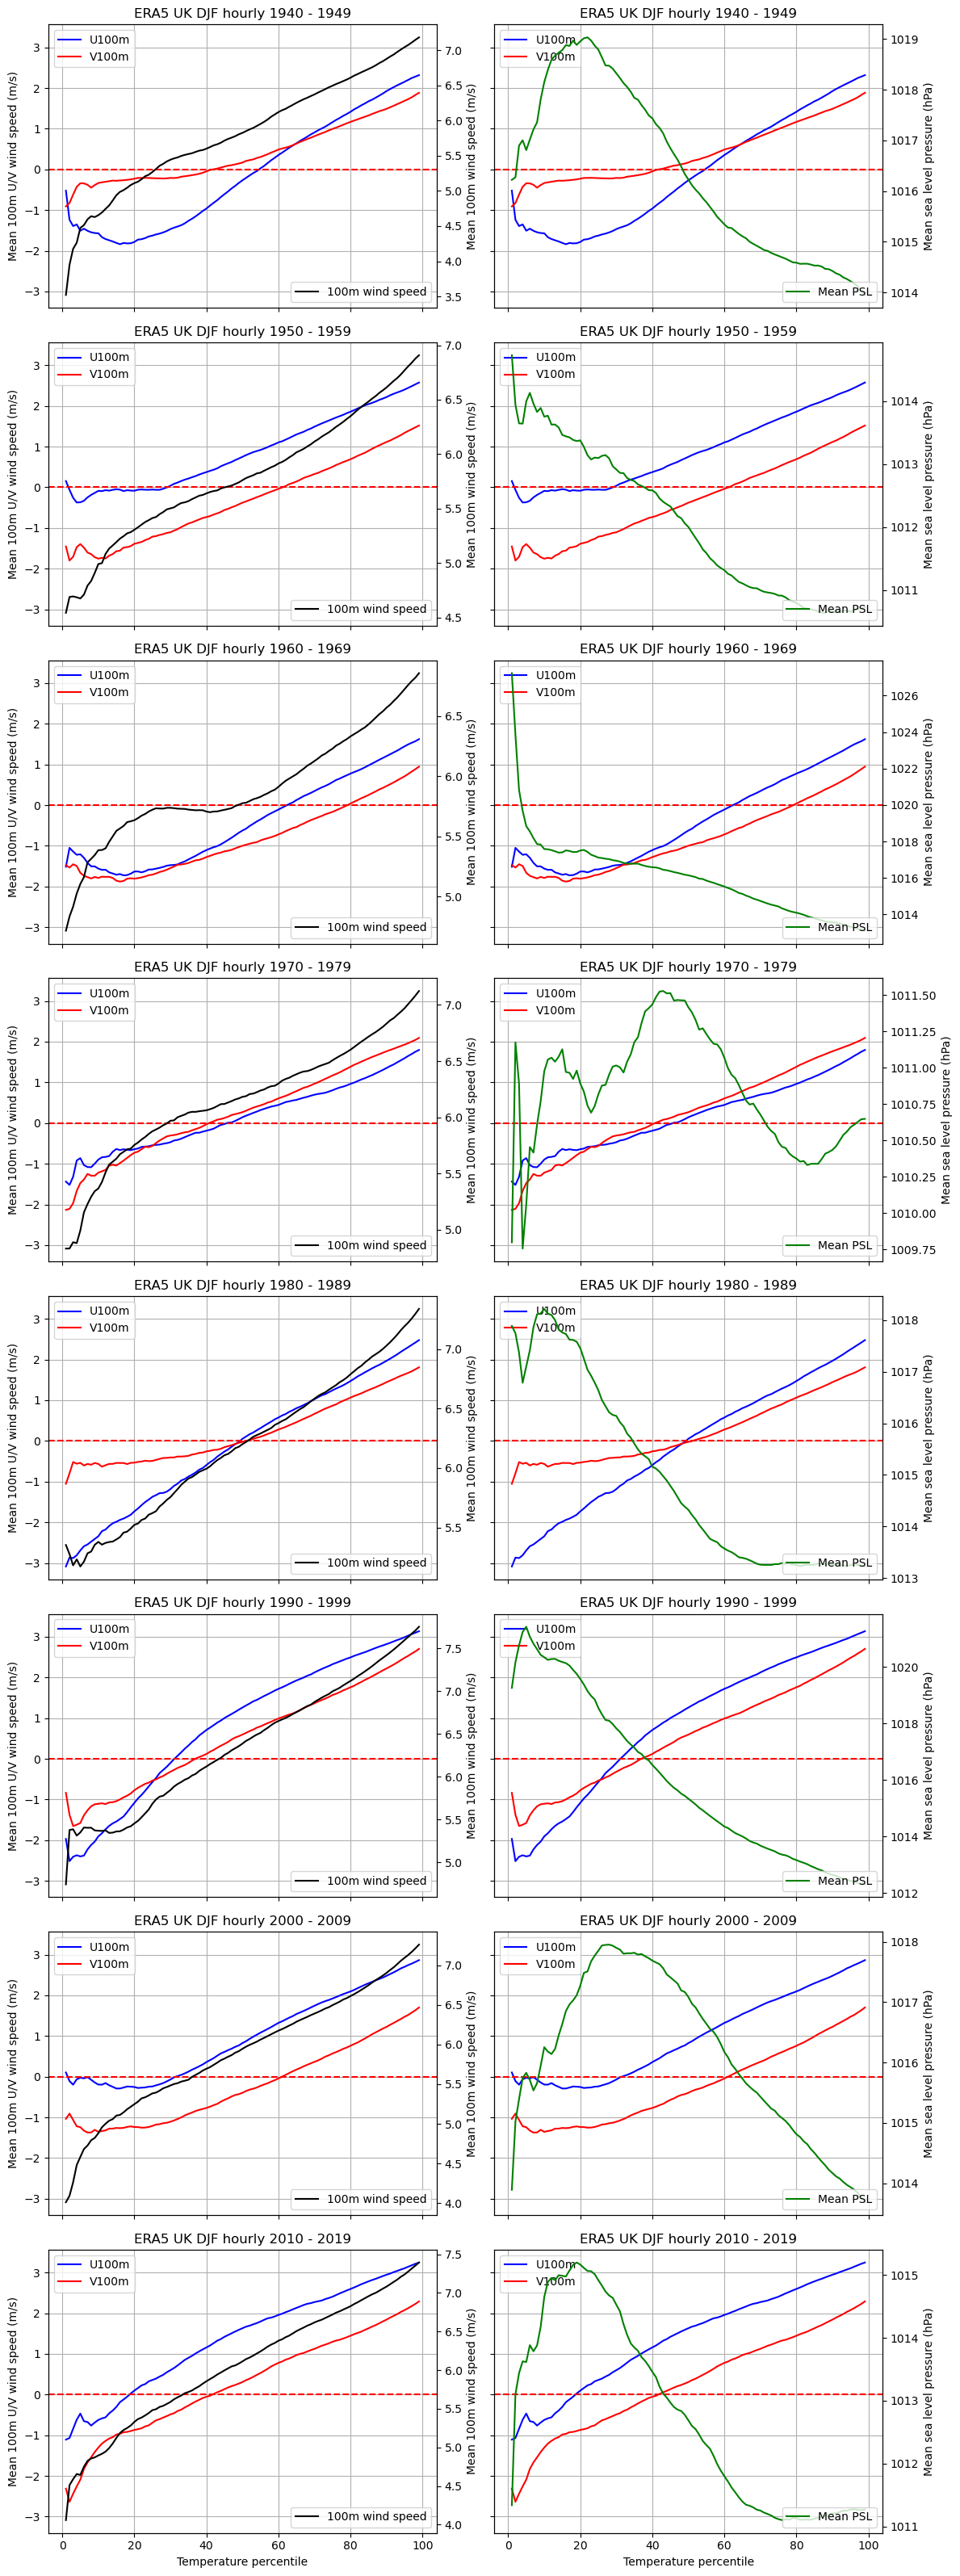

In [57]:
# Set up the subplots
fig, axs = plt.subplots(ncols=2, nrows=8, figsize=(12, 32), sharey=True, sharex=True)

# Loop over the dataframes
for df, years_this in zip(decade_dfs, decade_years):
    # Find the index of the current dataframe
    idx = decade_years.index(years_this)

    # Plot the data
    axs[idx, 0].plot(df["percentile"], df["mean_100m_U"], color="blue", label="U100m")

    # plot the V100m data
    axs[idx, 0].plot(df["percentile"], df["mean_100m_V"], color="red", label="V100m")

    # mark the zero line as a reference
    # dashed
    axs[idx, 0].axhline(0, color="red", linestyle="--")

    # create a duplicate y-axis and plot the 100m wind speed
    axs2 = axs[idx, 0].twinx()

    # Plot the data
    axs2.plot(df["percentile"], df["mean_100m_wind_speed"], color="black", label="100m wind speed")

    # Plot the data
    axs[idx, 1].plot(df["percentile"], df["mean_100m_U"], color="blue", label="U100m")

    # Plot the v data
    axs[idx, 1].plot(df["percentile"], df["mean_100m_V"], color="red", label="V100m")

    # MArk the zero line as a reference
    # dashed
    axs[idx, 1].axhline(0, color="red", linestyle="--")

    # create a duplicate y-axis and plot the 100m wind speed
    axs3 = axs[idx, 1].twinx()

    # Plot the data
    axs3.plot(df["percentile"], df["mean_psl"] / 100, color="green", label="Mean PSL")

    # if the index is the last one
    if idx == len(decade_years) - 1:
        # Set the labels
        axs[idx, 0].set_xlabel("Temperature percentile")
        
        # Set the labels
        axs[idx, 1].set_xlabel("Temperature percentile")

    # Set the labels
    axs[idx, 0].set_ylabel("Mean 100m U/V wind speed (m/s)")

    # Set the labels
    axs2.set_ylabel("Mean 100m wind speed (m/s)")

    # # Set the labels
    # axs[idx, 1].set_ylabel("Mean 100m U/V wind speed (m/s)")

    # Set the labels
    axs3.set_ylabel("Mean sea level pressure (hPa)")

    # Include titles showing the period
    axs[idx, 0].set_title(f"ERA5 UK DJF hourly {years_this[0]} - {years_this[-1]}")

    # Include titles showing the period
    axs[idx, 1].set_title(f"ERA5 UK DJF hourly {years_this[0]} - {years_this[-1]}")

    # include gridlines
    axs[idx, 0].grid()

    # include gridlines
    axs[idx, 1].grid()

    # include legend in the top left
    axs[idx, 0].legend(loc="upper left")

    # include legend for axs2
    axs2.legend(loc="lower right")

    # include legend in the top left
    axs[idx, 1].legend(loc="upper left")

    # include legend for axs3
    axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

## Relationship between NAO and temp/wind ##

Cheat by grabbing the observed monthly NAO values from NOAA.

Then repeat the same graph for positive and negative NAO winters.

In [58]:
# set up the path to the .txt file
nao_file_path = "/home/users/benhutch/unseen_multi_year/dfs/norm.nao.monthly.b5001.current.ascii.table.txt"

# load in the file
nao = pd.read_csv(nao_file_path, delim_whitespace=True, header=0, index_col=0)

/tmp/ipykernel_1480534/1367832627.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  nao = pd.read_csv(nao_file_path, delim_whitespace=True, header=0, index_col=0)


In [59]:
nao.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1950,0.92,0.40,-0.36,0.73,-0.59,-0.06,-1.26,-0.05,0.25,0.85,-1.26,-1.02
1951,0.08,0.70,-1.02,-0.22,-0.59,-1.64,1.37,-0.22,-1.36,1.87,-0.39,1.32
1952,0.93,-0.83,-1.49,1.01,-1.12,-0.40,-0.09,-0.28,-0.54,-0.73,-1.13,-0.43
1953,0.33,-0.49,-0.04,-1.67,-0.66,1.09,0.40,-0.71,-0.35,1.32,1.04,-0.47
1954,0.37,0.74,-0.83,1.34,-0.09,-0.25,-0.60,-1.90,-0.44,0.60,0.40,0.69


In [60]:
# Unpivot the DataFrame
nao_reset = nao.reset_index().melt(id_vars='index', var_name='Month', value_name='Value')

In [61]:
nao_reset.tail()

,index,Month,Value
907,2021,Dec,0.29
908,2022,Dec,-0.15
909,2023,Dec,1.94
910,2024,Dec,1.21
911,2025,Dec,NaN


In [62]:
# Create a datetime index
nao_reset['Date'] = pd.to_datetime(nao_reset['index'].astype(str) + '-' + nao_reset['Month'], format='%Y-%b')

# Set the datetime index
nao_time_series = nao_reset.set_index('Date').sort_index()

# Drop the now redundant columns
nao_time_series = nao_time_series.drop(columns=['index', 'Month'])

# Display the resulting time series
print(nao_time_series.head())

            Value
Date             
1950-01-01   0.92
1950-02-01   0.40
1950-03-01  -0.36
1950-04-01   0.73
1950-05-01  -0.59


In [63]:
# subset to only DJF months
nao_djf = nao_time_series[nao_time_series.index.month.isin([12, 1, 2])]

In [64]:
# create a new column for the effective dec year
def create_effective_dec_year(row):
    # Find the month
    month = row.name.month

    # Find the year
    year = row.name.year

    # If the month is 1, 2 or 3
    if month in [1, 2]:
        # Return the year minus 1
        return year - 1
    else:
        # Otherwise return the year
        return year

# Apply the function to the time series nao_djf
nao_djf['effective_dec_year'] = nao_djf.apply(create_effective_dec_year, axis=1)

/tmp/ipykernel_1480534/149227485.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nao_djf['effective_dec_year'] = nao_djf.apply(create_effective_dec_year, axis=1)


In [65]:
nao_djf.head()

,Value,effective_dec_year
Date,,
1950-01-01,0.92,1949
1950-02-01,0.40,1949
1950-12-01,-1.02,1950
1951-01-01,0.08,1950
1951-02-01,0.70,1950


In [66]:
# grouupby the effective dec year, set the index to the effective dec year and find the mean
nao_djf_decade = nao_djf.groupby('effective_dec_year').mean()

In [67]:
nao_djf_decade.head()

,Value
effective_dec_year,
1949,0.660000
1950,-0.080000
1951,0.473333
1952,-0.196667
1953,0.213333


In [68]:
# set up nao +ve, nao -ve and nao neutral in a new column
for row in nao_djf_decade.itertuples():
    if row.Value > 0.40:
        nao_djf_decade.loc[row.Index, 'nao_phase'] = 'nao_positive'
    elif row.Value < -0.40:
        nao_djf_decade.loc[row.Index, 'nao_phase'] = 'nao_negative'
    else:
        nao_djf_decade.loc[row.Index, 'nao_phase'] = 'nao_neutral'

In [69]:
# apply the effective dec year function to comp_path_djf_hourly
comp_path_djf_hourly['effective_dec_year'] = comp_path_djf_hourly.apply(create_effective_dec_year, axis=1)

/tmp/ipykernel_1480534/1456737165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_path_djf_hourly['effective_dec_year'] = comp_path_djf_hourly.apply(create_effective_dec_year, axis=1)


In [72]:
# loop over the unique years in the effective dec year column in comp_path_djf_hourly
for year in comp_path_djf_hourly['effective_dec_year'].unique():
    # if the year is not in nao_djf_decade
    if year not in nao_djf_decade.index:
        # Continue
        continue

    # find the nao phase for this year
    nao_phase_this = nao_djf_decade.loc[year, 'nao_phase']

    # set the nao phase for this year in comp_path_djf_hourly
    comp_path_djf_hourly.loc[comp_path_djf_hourly['effective_dec_year'] == year, 'nao_phase'] = nao_phase_this

/tmp/ipykernel_1480534/1778604771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_path_djf_hourly.loc[comp_path_djf_hourly['effective_dec_year'] == year, 'nao_phase'] = nao_phase_this


In [90]:
# set up an empty list to append the dfs to
nao_dfs = []

# loop over the unique nao phases
for nao_phase in comp_path_djf_hourly['nao_phase'].unique():
    # subset the data to this nao phase
    comp_path_djf_hourly_this = comp_path_djf_hourly[comp_path_djf_hourly['nao_phase'] == nao_phase]

    # Set up new dataframe
    comp_djf_perc_hourly_this = pd.DataFrame()

    # Loop over the percentiles
    for percentile in percentiles:
        # Find the percentile for hannah ch
        tas_percentile_this_comp = comp_path_djf_hourly_this["2_metre_temperature"].quantile(percentile / 100)

        # Subset the df to where temperature is below this threshold
        comp_djf_this = comp_path_djf_hourly_this[comp_path_djf_hourly_this["2_metre_temperature"] < tas_percentile_this_comp]

        # Set up a new dataframe
        comp_djf_perc_this = pd.DataFrame(
            {
                "percentile": [percentile],
                "threshold": [tas_percentile_this_comp],
                "n_hours": [comp_djf_this.shape[0]],
                "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
                "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
                "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
                "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
                "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
                "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
                "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
                "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
                "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
                "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
                "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
                "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
                "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
                "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
            }
        )

        # Concat these dataframes
        comp_djf_perc_hourly_this = pd.concat([comp_djf_perc_hourly_this, comp_djf_perc_this])

    # Append the dataframe to the list
    nao_dfs.append(comp_djf_perc_hourly_this)

In [95]:
comp_path_djf_hourly["nao_phase"].unique()

array(['nao_positive', 'nao_neutral', 'nao_negative'], dtype=object)

In [96]:
comp_path_djf_hourly["nao_phase"].unique()

array(['nao_positive', 'nao_neutral', 'nao_negative'], dtype=object)

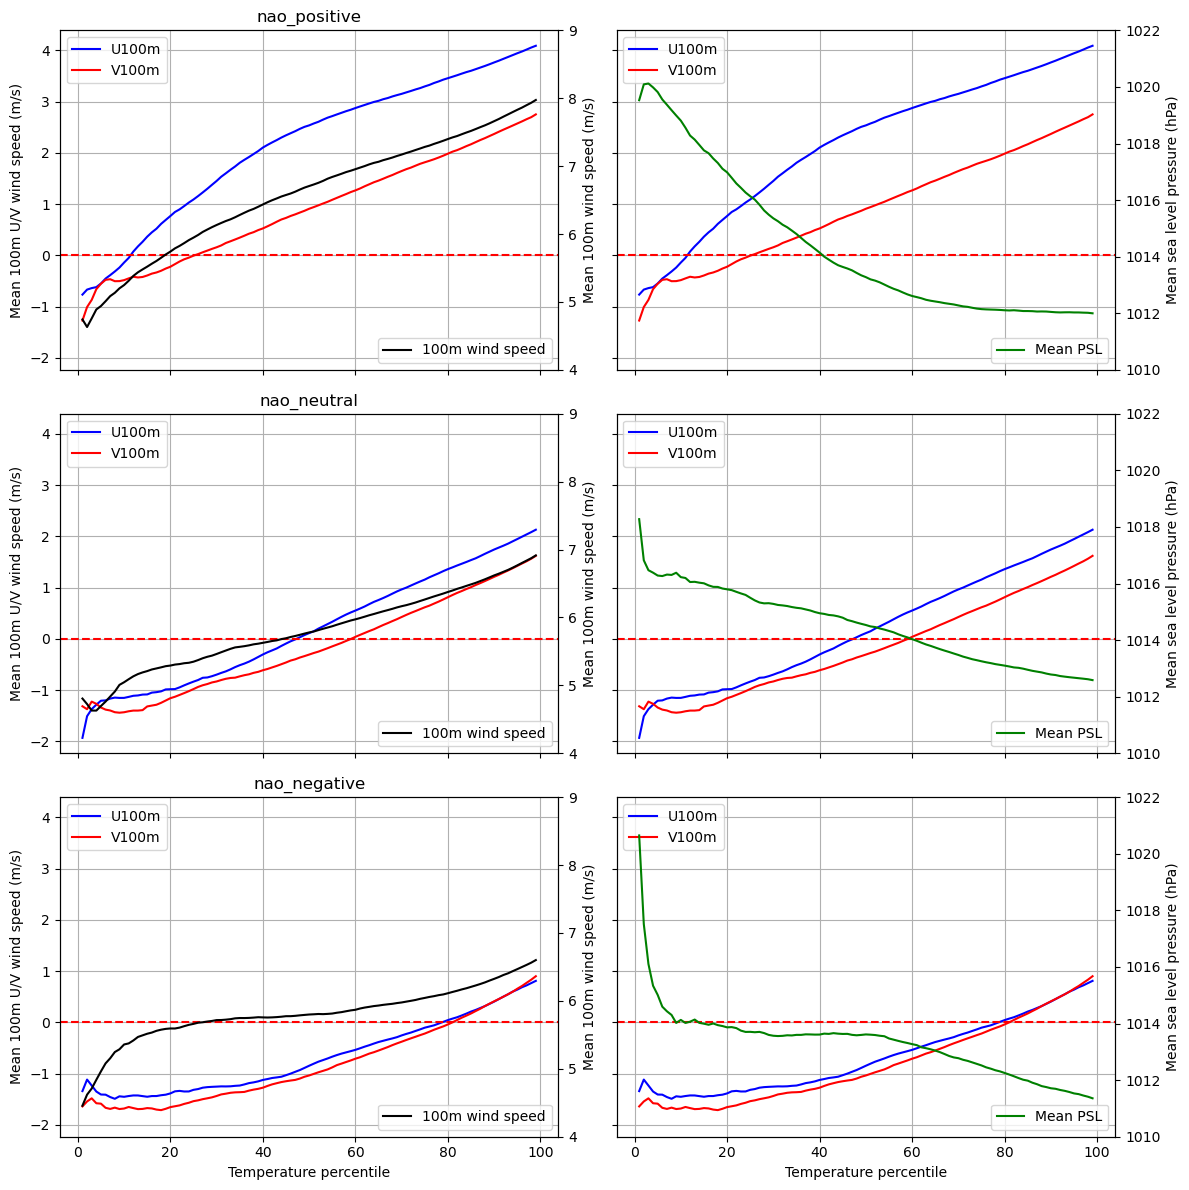

In [101]:
# Set up the subplots
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(12, 12), sharey=True, sharex=True)

# Loop over the dataframes
for df, nao_phase in zip(nao_dfs, comp_path_djf_hourly["nao_phase"].unique()):
    # Find the index of the current dataframe
    idx = comp_path_djf_hourly['nao_phase'].unique().tolist().index(nao_phase)

    # Plot the data
    axs[idx, 0].plot(df["percentile"], df["mean_100m_U"], color="blue", label="U100m")

    # plot the V100m data
    axs[idx, 0].plot(df["percentile"], df["mean_100m_V"], color="red", label="V100m")

    # mark the zero line as a reference
    # dashed
    axs[idx, 0].axhline(0, color="red", linestyle="--")

    # create a duplicate y-axis and plot the 100m wind speed
    axs2 = axs[idx, 0].twinx()

    # Plot the data
    axs2.plot(df["percentile"], df["mean_100m_wind_speed"], color="black", label="100m wind speed")

    # Plot the data
    axs[idx, 1].plot(df["percentile"], df["mean_100m_U"], color="blue", label="U100m")

    # Plot the v data
    axs[idx, 1].plot(df["percentile"], df["mean_100m_V"], color="red", label="V100m")

    # MArk the zero line as a reference
    # dashed
    axs[idx, 1].axhline(0, color="red", linestyle="--")

    # create a duplicate y-axis and plot the 100m wind speed
    axs3 = axs[idx, 1].twinx()

    # Plot the data
    axs3.plot(df["percentile"], df["mean_psl"] / 100, color="green", label="Mean PSL")

    # if the index is the last one
    if idx == len(comp_path_djf_hourly['nao_phase'].unique()) - 1:
        # Set the labels
        axs[idx, 0].set_xlabel("Temperature percentile")
        
        # Set the labels
        axs[idx, 1].set_xlabel("Temperature percentile")

    # Set the labels
    axs[idx, 0].set_ylabel("Mean 100m U/V wind speed (m/s)")

    # Set up the title
    axs[idx, 0].set_title(f"{nao_phase}")

    # Set the labels
    axs2.set_ylabel("Mean 100m wind speed (m/s)")

    # # Set the labels
    # axs[idx, 1].set_ylabel("Mean 100m U/V wind speed (m/s)")

    # Set the labels
    axs3.set_ylabel("Mean sea level pressure (hPa)")

    # Set u the gridlines
    axs[idx, 0].grid()

    # Set u the gridlines
    axs[idx, 1].grid()

    # include legend in the top left
    axs[idx, 0].legend(loc="upper left")

    # include legend for axs2
    axs2.legend(loc="lower right")

    # include legend in the top left
    axs[idx, 1].legend(loc="upper left")

    # include legend for axs3
    axs3.legend(loc="lower right")

    # set the ylim for axs as 1010 to 1022
    axs3.set_ylim(1010, 1022)

    # set the ylim for axs2 as 4 to 8
    axs2.set_ylim(4, 9)

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()


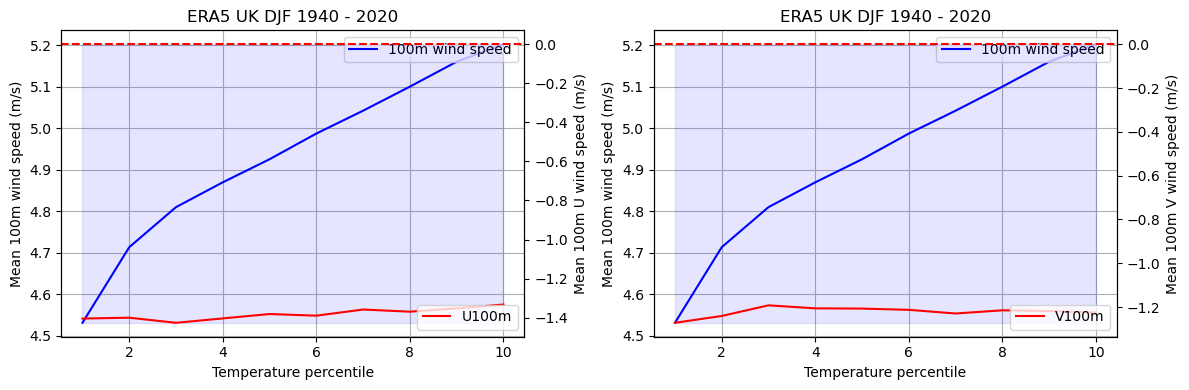

In [45]:
# limit to the 1st to 10the percentiles
comp_djf_perc_hourly = comp_djf_perc_hourly[comp_djf_perc_hourly["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs3.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs3.text(3, -0.5, "Northerly flow", color="blue")

# axs3.text(3, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper right")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper right")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

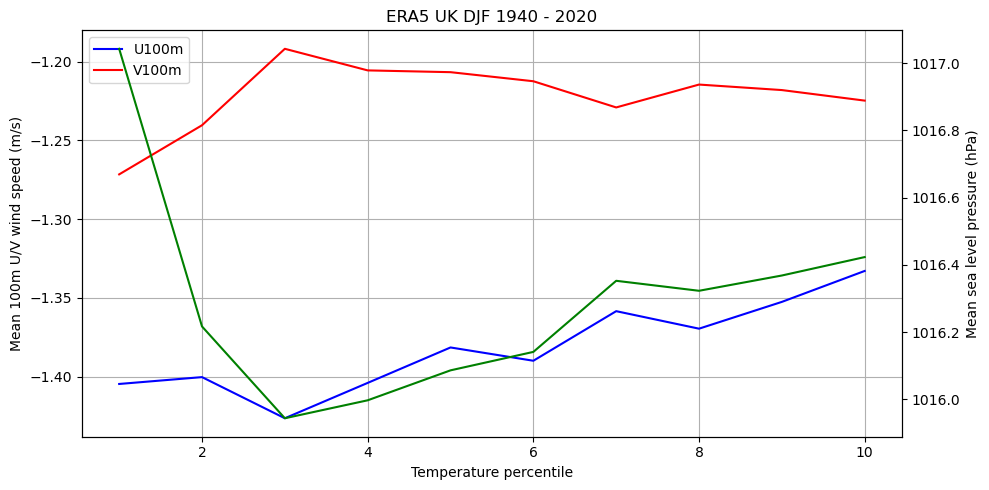

In [46]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc_hourly[comp_djf_perc_hourly["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")


# add a second y-axis
axs2 = axs.twinx()

# include the mean sea level pressure
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_psl"] / 100, color="green", label="Mean PSL")

# Set the label for the y axis
axs2.set_ylabel("Mean sea level pressure (hPa)")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()

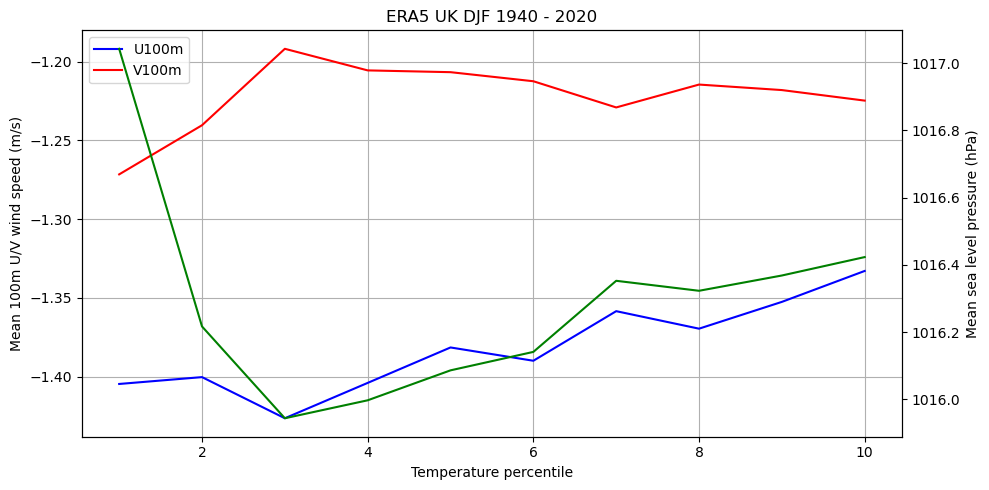

In [47]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc_hourly[comp_djf_perc_hourly["percentile"].isin(np.arange(1, 40 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# add a second y-axis
axs2 = axs.twinx()

# include the mean sea level pressure
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_psl"] / 100, color="green", label="Mean PSL")

# Set the label for the y axis
axs2.set_ylabel("Mean sea level pressure (hPa)")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()